In [1]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

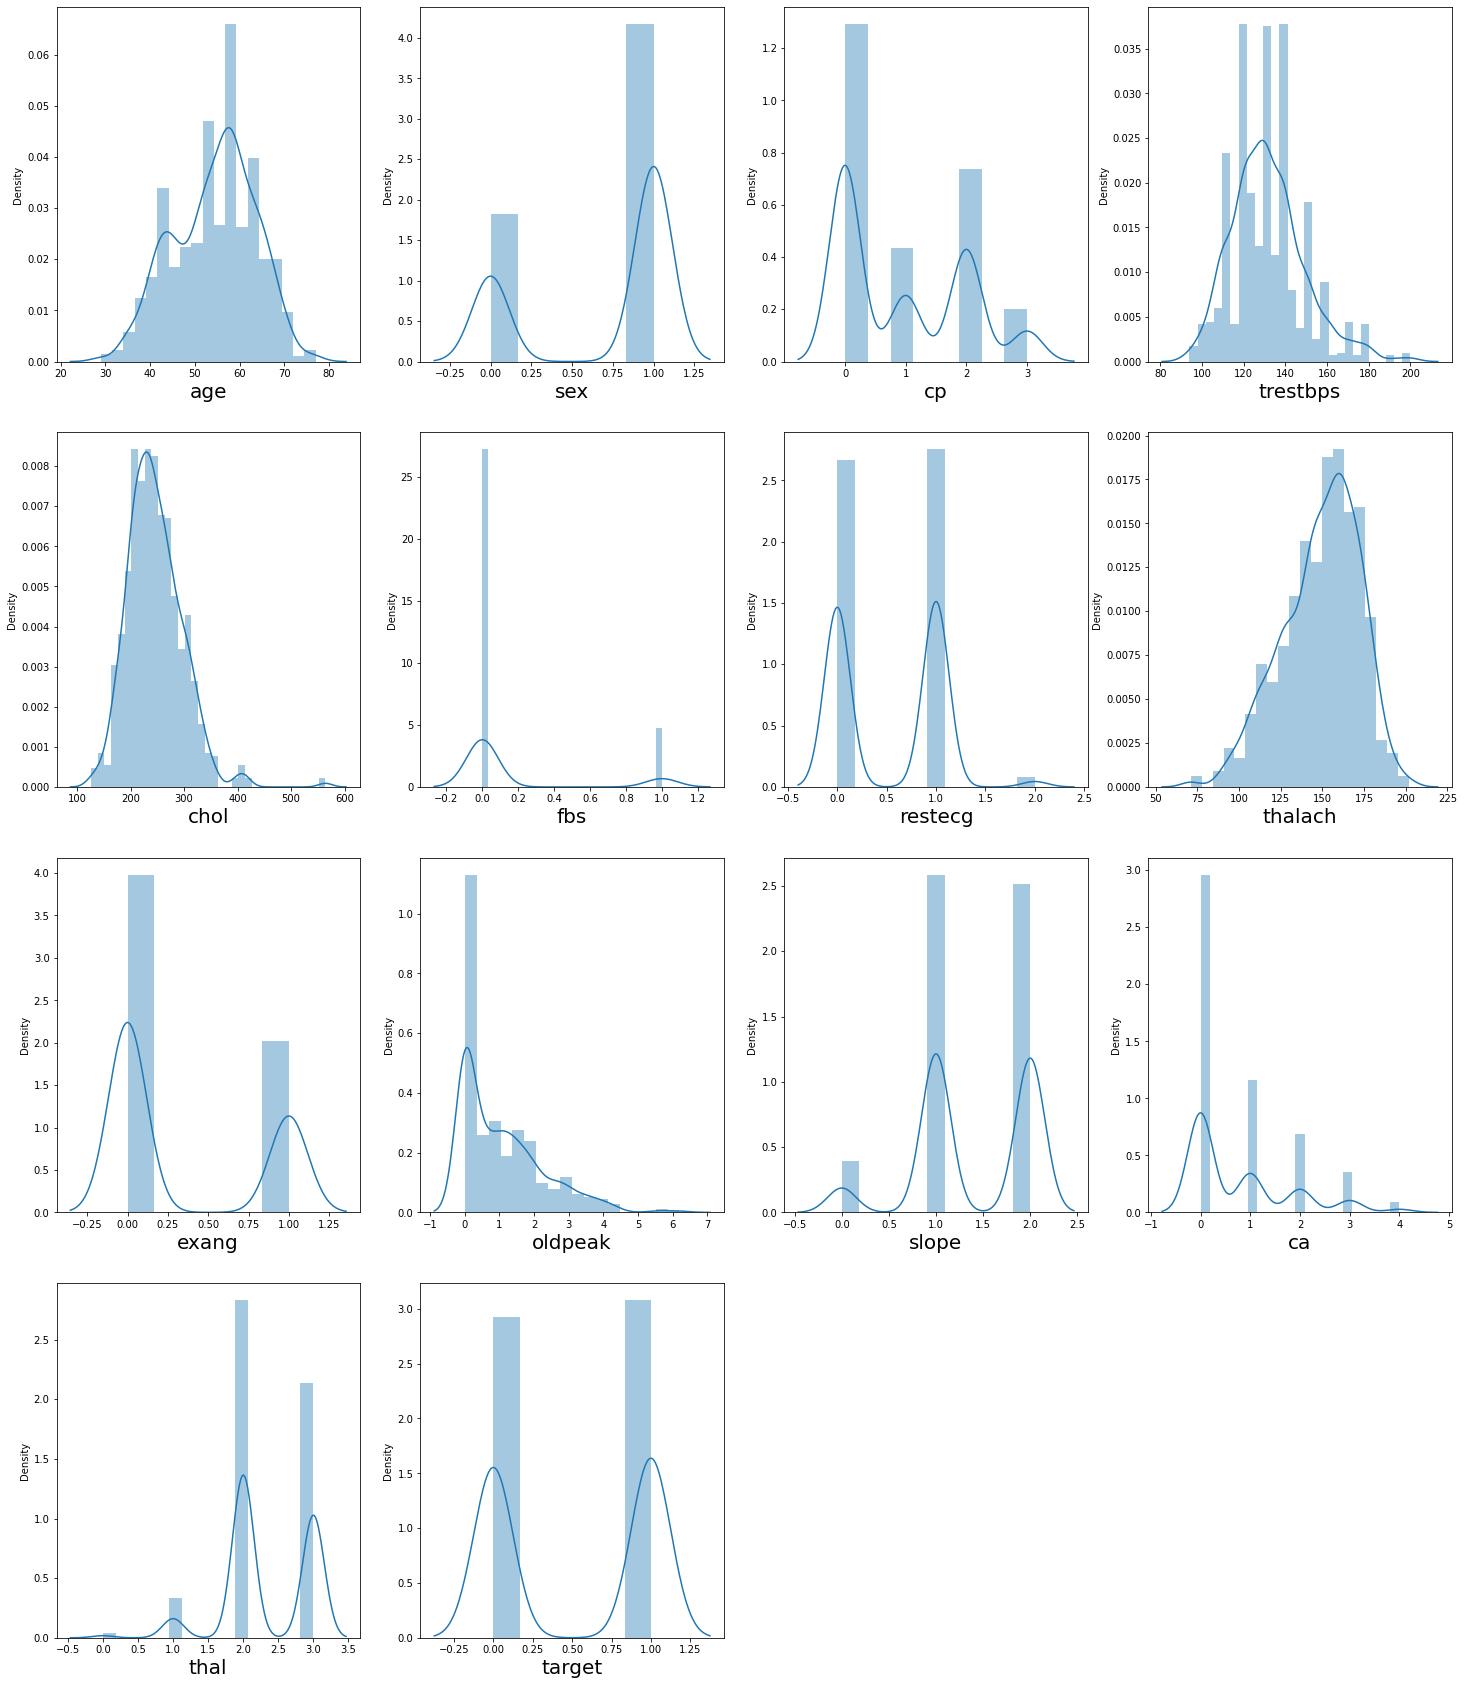

In [ ]:
plt.figure(figsize=(25,30), facecolor= 'white')
plotnumber = 1
for column in data:

  if plotnumber <= data.shape[1]:
    ax = plt.subplot(4, 4, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
    
  plotnumber += 1
plt.show()

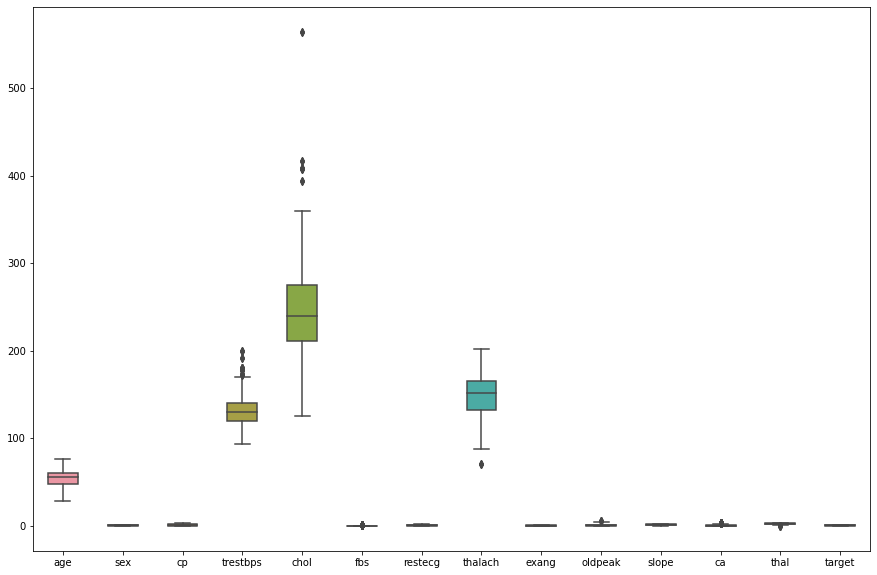

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = data, width = 0.5 , ax = ax, fliersize=5)

In [ ]:
q = data['trestbps'].quantile(0.95)
print(q)
data_cleaned = data[data['trestbps']< q]
q = data['chol'].quantile(0.95)

data_cleaned = data_cleaned[data['chol']< q]
print(data_cleaned)

163.19999999999982
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


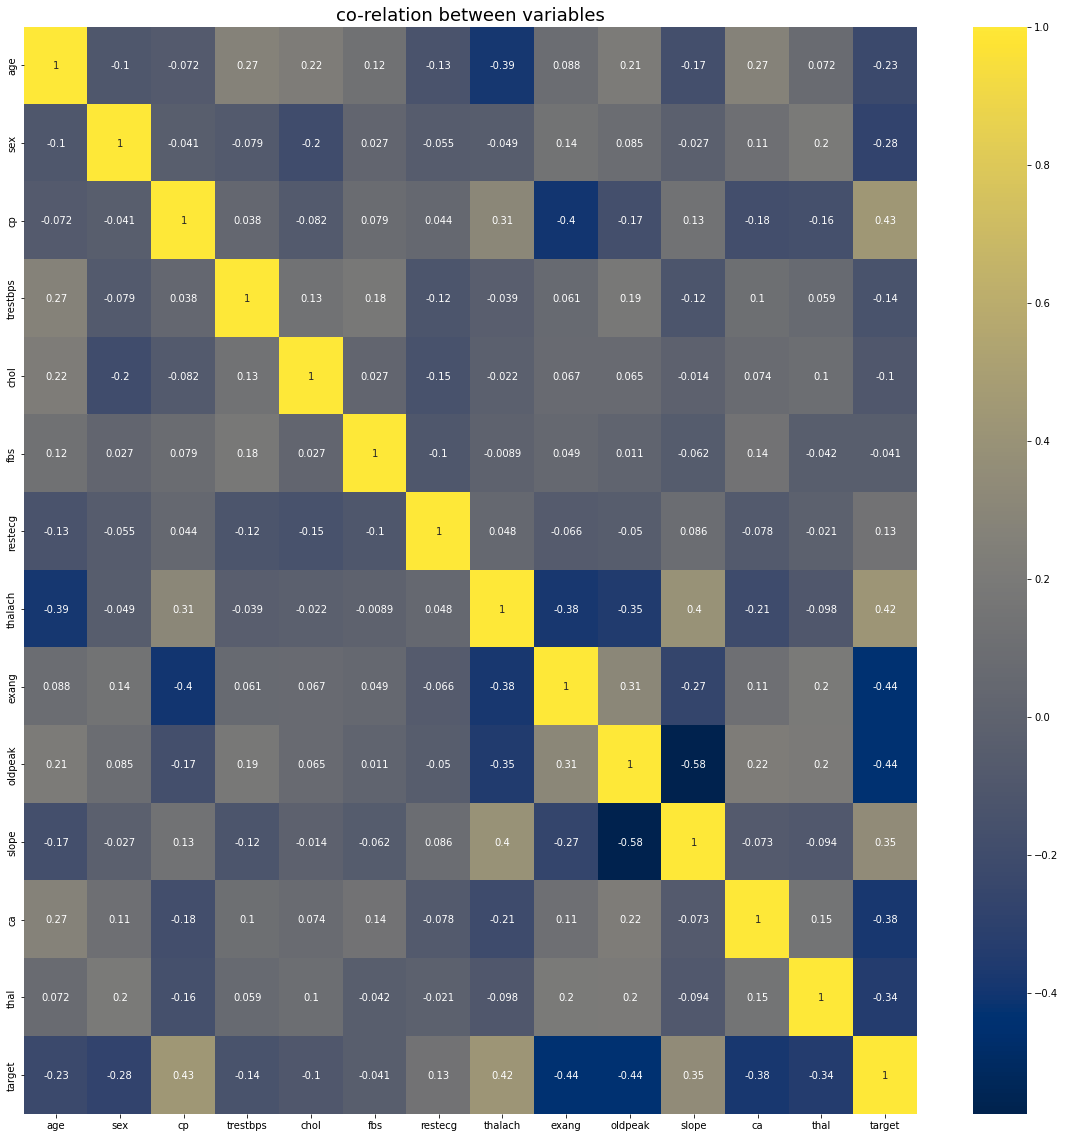

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot=True,cmap='cividis')
plt.title('co-relation between variables',fontsize=18)
plt.show()

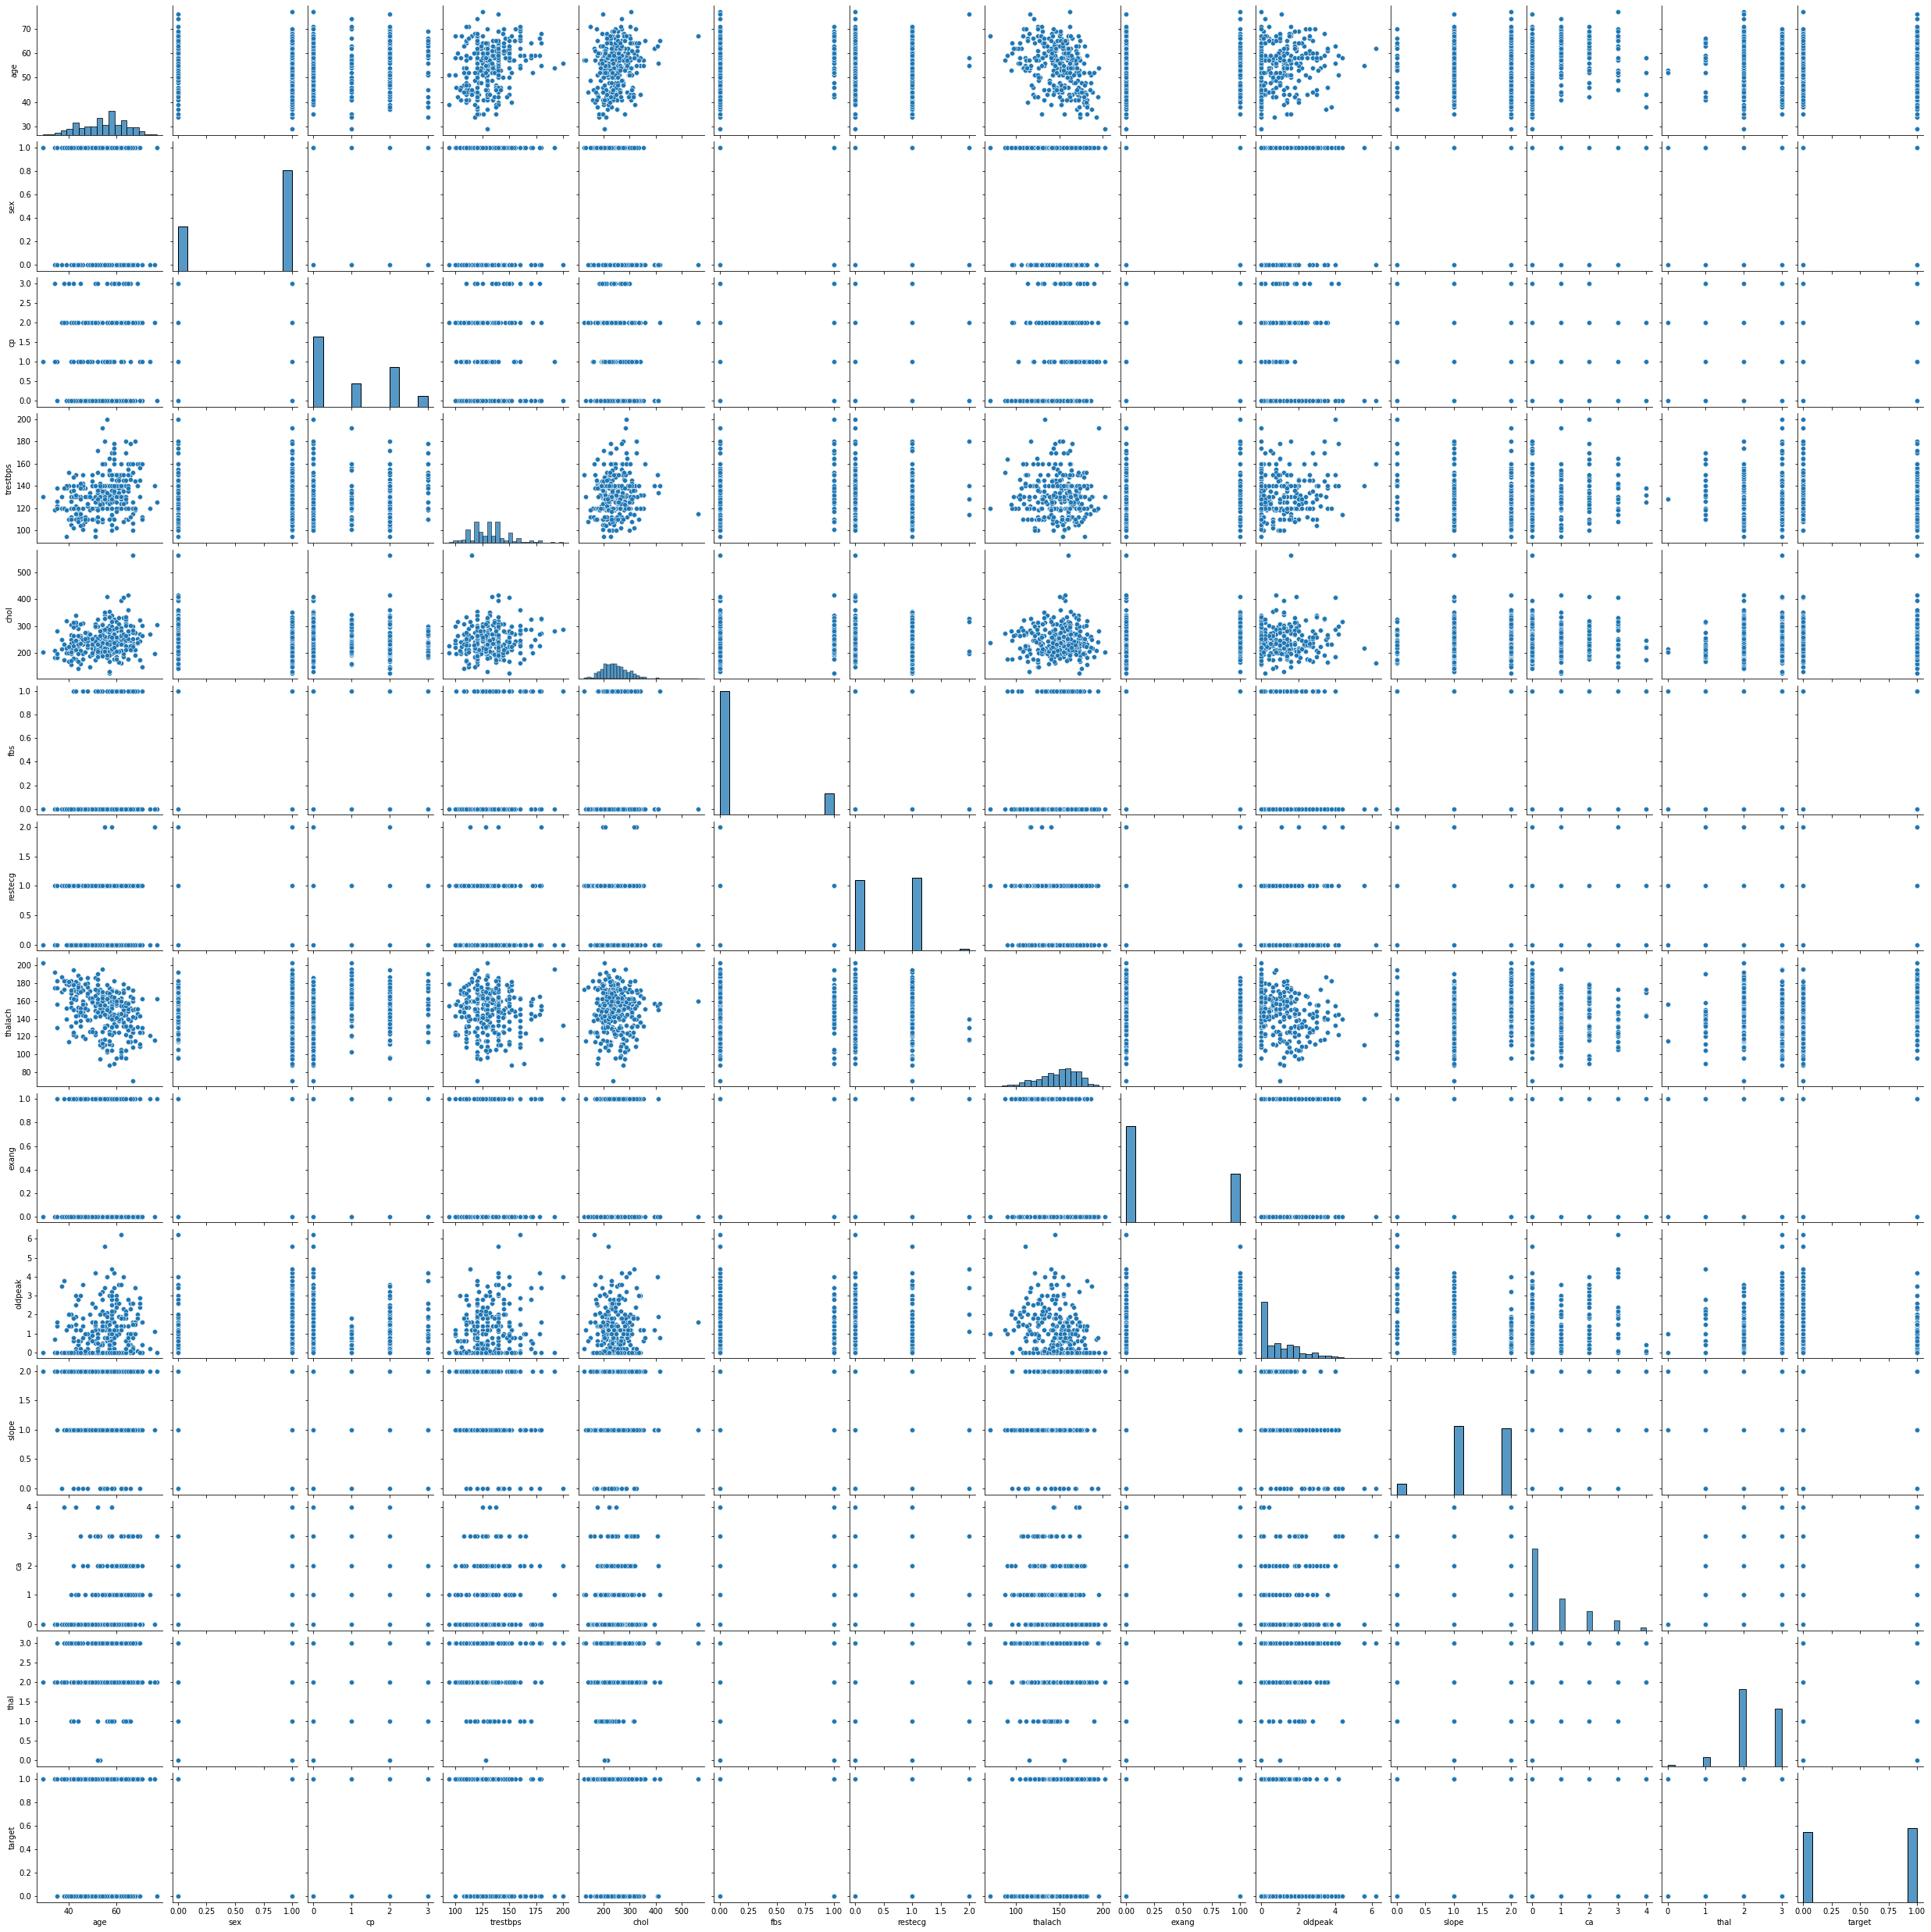

In [ ]:
sns.pairplot(data, height = 2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

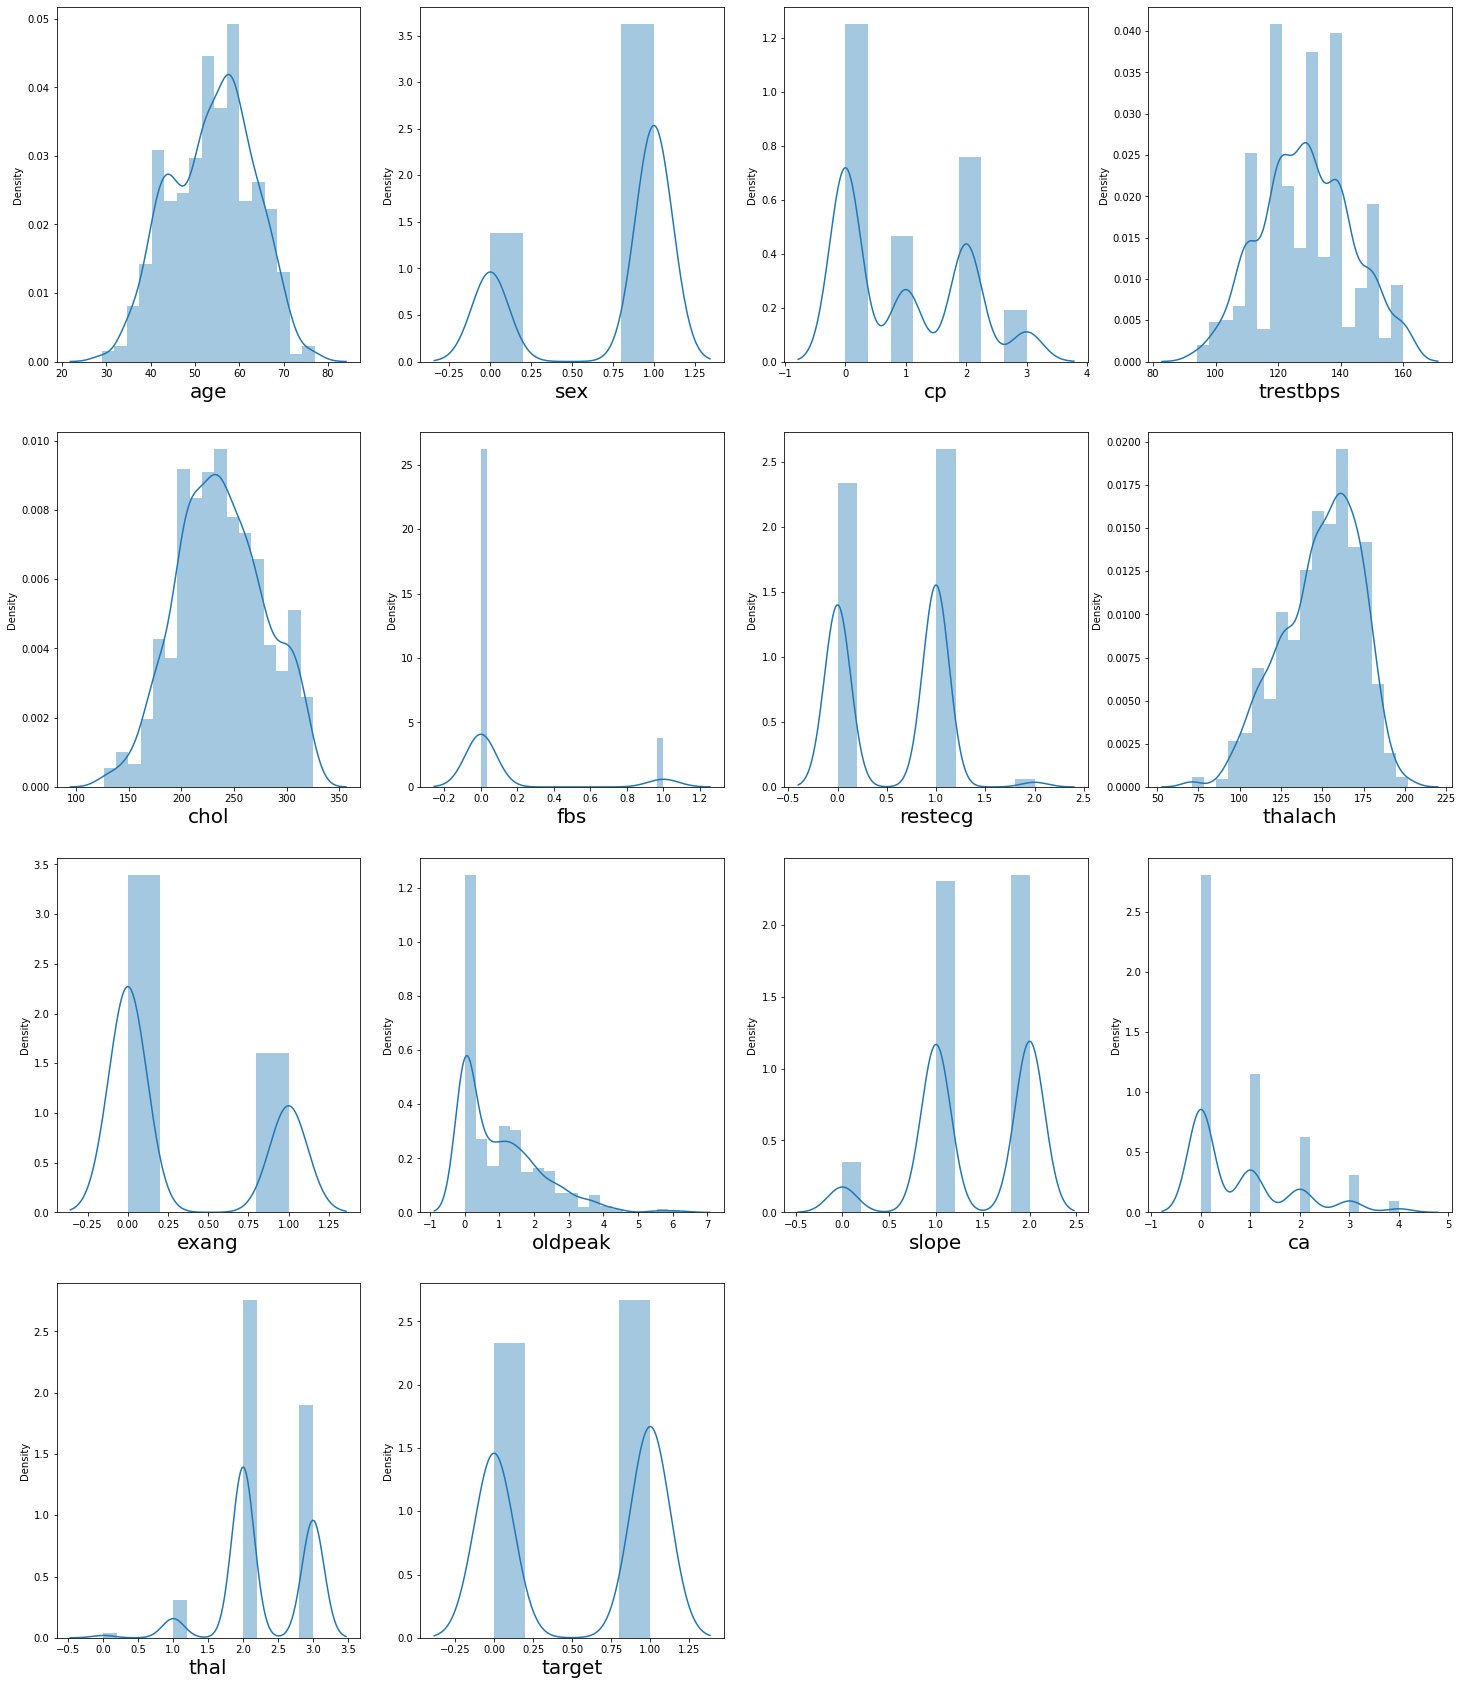

In [ ]:
plt.figure(figsize=(25,30), facecolor= 'white')
plotnumber = 1
for column in data_cleaned:
  if plotnumber<= data.shape[1]:
    ax = plt.subplot(4, 4, plotnumber)
    sns.distplot(data_cleaned[column])
    plt.xlabel(column, fontsize = 20)
    
  plotnumber += 1
plt.show()

In [ ]:
minage = min(data['age'])
maxage = max(data['age'])
meanage = (data['age'].mean())
print('Minimum age of the dataset:',minage)
print('Miximum age of the dataset:',maxage)
print('Mean age of the dataset:',meanage)

Minimum age of the dataset: 29
Miximum age of the dataset: 77
Mean age of the dataset: 54.43414634146342


In [ ]:
x = data.age.value_counts()[:10]
x

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
Name: age, dtype: int64

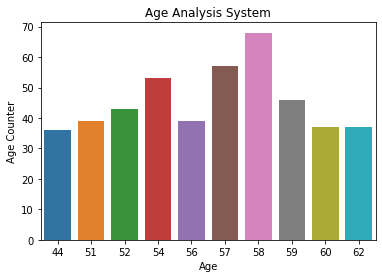

In [ ]:
sns.barplot(x=data.age.value_counts()[:10].index, y=data.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [ ]:
youngAge = data[(data.age >= 27) & (data.age < 40)]
print(len(youngAge))
middleAge = data[(data.age >= 40) & (data.age < 60)]
print(len(middleAge))
elderlyAge = data[(data.age >= 60) & (data.age < 78)]
print(len(elderlyAge))

57
659
309


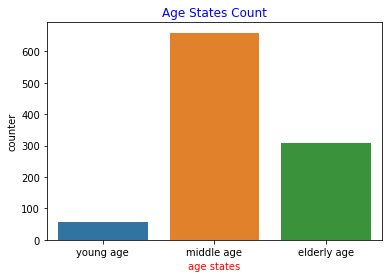

In [ ]:
sns.barplot(x = ['young age', 'middle age', 'elderly age'], y = [len(youngAge), len(middleAge), len(elderlyAge)])
plt.xlabel('age states',color = 'r')
plt.ylabel('counter')
plt.title('Age States Count', color = 'b')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


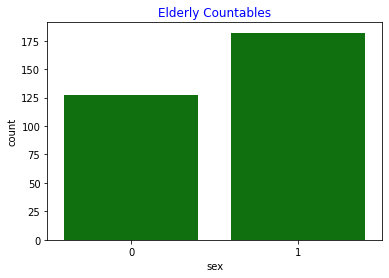

In [ ]:
sns.countplot(elderlyAge.sex, color = 'g')
plt.title('Elderly Countables', color = 'b')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


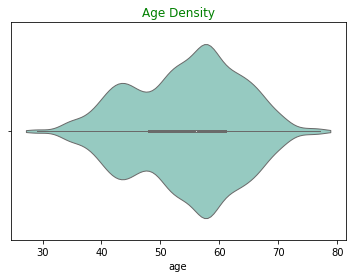

In [ ]:
sns.violinplot(data.age, palette ='Set3', cut =1, bw =0.2, linewidth= 1)
plt.title('Age Density', color = 'g')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


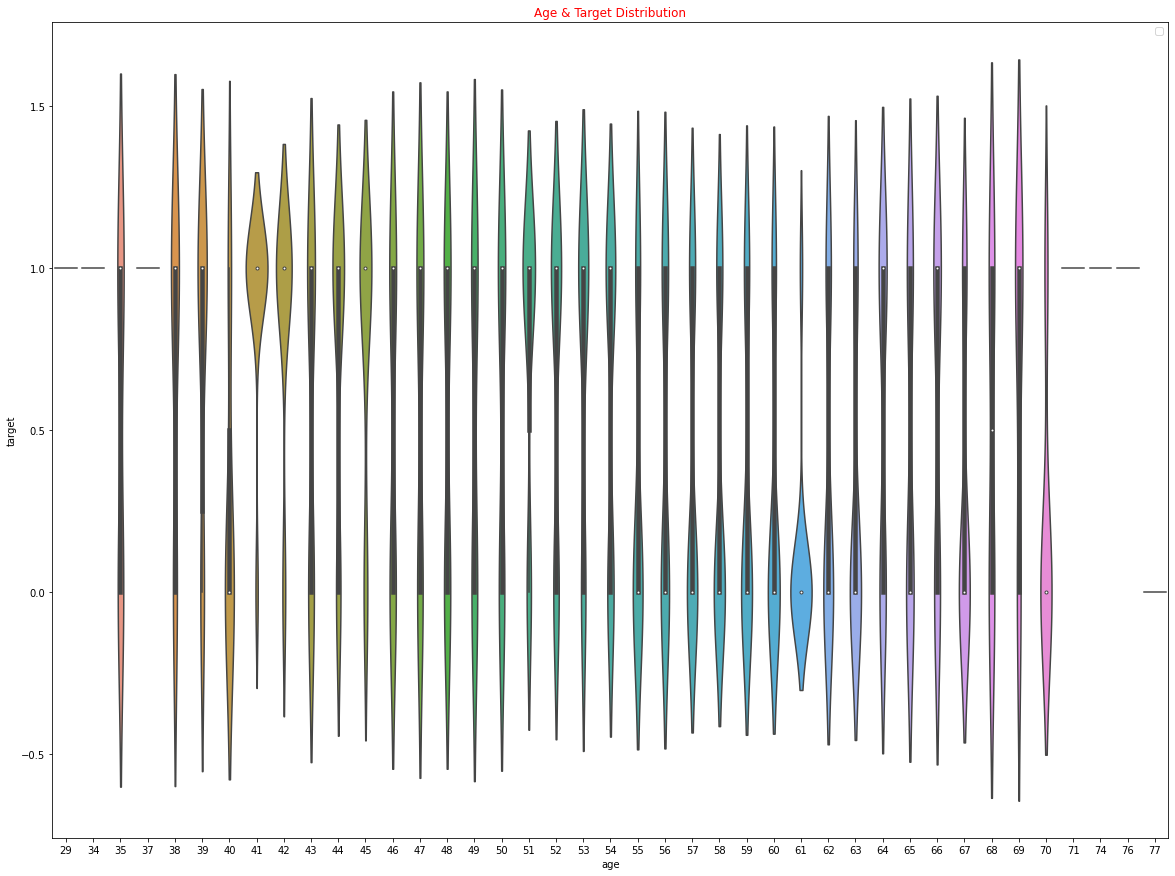

In [ ]:
plt.figure(figsize=(20,15))
sns.violinplot(data.age, data.target)
plt.title('Age & Target Distribution', color = 'r')
plt.legend()
plt.show()

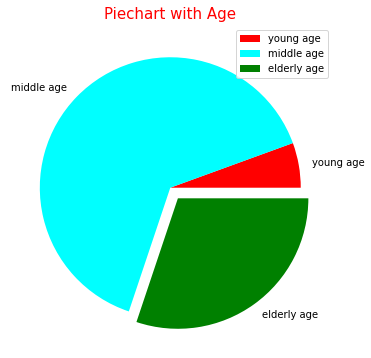

In [ ]:
color = ['red','cyan','green']
explode = [0,0,0.1]
plt.figure(figsize = (6,6))
plt.pie([len(youngAge),len(middleAge),len(elderlyAge)],labels=['young age','middle age','elderly age'],explode=explode,colors=color)
plt.title('Piechart with Age',color = 'r',fontsize = 15)
plt.legend()
plt.show()


In [ ]:
data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


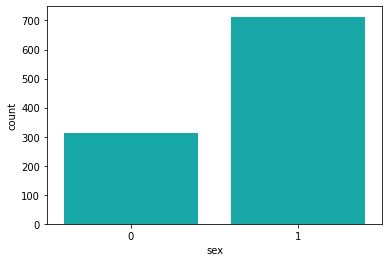

In [ ]:
sns.countplot(data.sex, color='c' )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


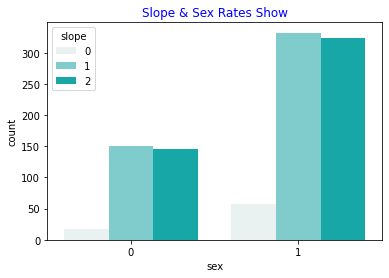

In [ ]:
sns.countplot(data.sex, hue= data.slope, color ='c')
plt.title('Slope & Sex Rates Show',color = 'b')
plt.show()

In [ ]:
count_gender = len(data.sex)
print(count_gender)
count_male = len(data[data.sex== 1])
print(count_male)
count_female = len(data[data.sex== 0])
print(count_female)

1025
713
312


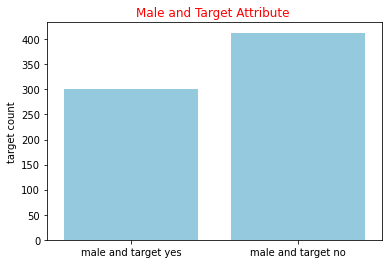

In [ ]:
male_target_yes = len(data[(data['sex'] ==1) & (data['target']== 1)])
male_target_no = len(data[(data['sex'] ==1) & (data['target']== 0)])

sns.barplot(x=['male and target yes', 'male and target no'], y=[male_target_yes, male_target_no], color = 'skyblue')
plt.title('Male and Target Attribute ',color='r')
plt.ylabel('target count')
plt.show() 

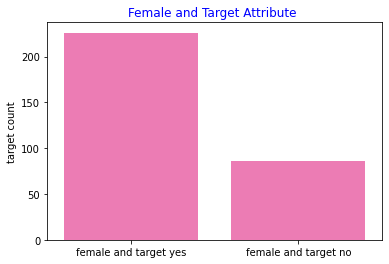

In [ ]:
female_target_yes = len(data[(data['sex'] == 0) & (data['target']== 1)])
female_target_no = len(data[(data['sex'] == 0) & (data['target']== 0)])

sns.barplot(x=['female and target yes', 'female and target no'], y=[female_target_yes, female_target_no], color = 'hotpink')
plt.title('Female and Target Attribute ',color='b')
plt.ylabel('target count')
plt.show() 

In [ ]:
data.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


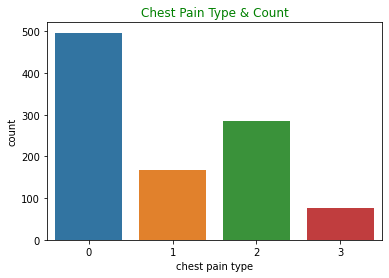

In [ ]:
sns.countplot(data.cp)
plt.xlabel('chest pain type')
plt.title('Chest Pain Type & Count', color ='g')
plt.show()

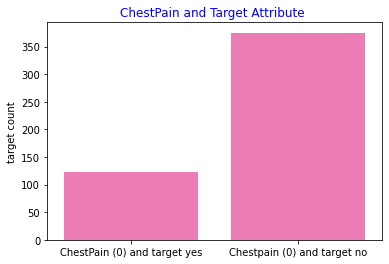

In [ ]:
cpzero_target_yes = len(data[(data['cp'] == 0) & (data['target']== 1)])
cpzero_target_no = len(data[(data['cp'] == 0) & (data['target']== 0)])

sns.barplot(x=['ChestPain (0) and target yes', 'Chestpain (0) and target no'], y=[cpzero_target_yes, cpzero_target_no], color = 'hotpink')
plt.title('ChestPain and Target Attribute ',color='b')
plt.ylabel('target count')
plt.show() 

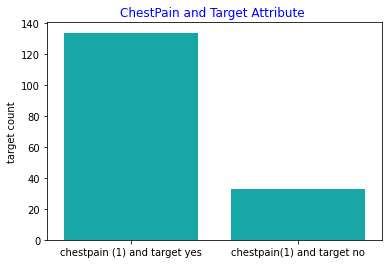

In [ ]:
chestpain_target_yes = len(data[(data['cp'] == 1) & (data['target']== 1)])
chestpain_target_no = len(data[(data['cp'] == 1) & (data['target']== 0)])

sns.barplot(x=['chestpain (1) and target yes', 'chestpain(1) and target no'], y=[chestpain_target_yes, chestpain_target_no], color = 'c')
plt.title('ChestPain and Target Attribute ',color='b')
plt.ylabel('target count')
plt.show()

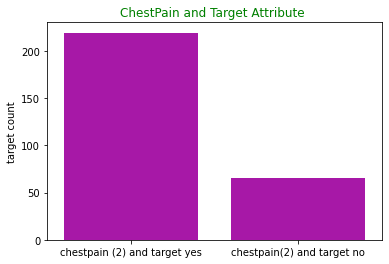

In [ ]:
chestpain_target_yes = len(data[(data['cp'] == 2) & (data['target']== 1)])
chestpain_target_no = len(data[(data['cp'] == 2) & (data['target']== 0)])

sns.barplot(x=['chestpain (2) and target yes', 'chestpain(2) and target no'], y=[chestpain_target_yes, chestpain_target_no], color = 'm')
plt.title('ChestPain and Target Attribute ',color='g')
plt.ylabel('target count')
plt.show()

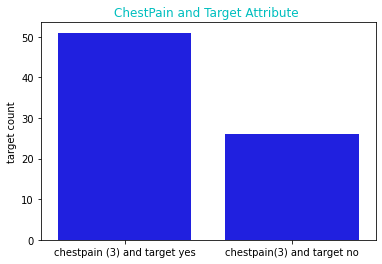

In [ ]:
chestpain_target_yes = len(data[(data['cp'] == 3) & (data['target']== 1)])
chestpain_target_no = len(data[(data['cp'] == 3) & (data['target']== 0)])

sns.barplot(x=['chestpain (3) and target yes', 'chestpain(3) and target no'], y=[chestpain_target_yes, chestpain_target_no], color = 'blue')
plt.title('ChestPain and Target Attribute ',color='c')
plt.ylabel('target count')
plt.show()

In [ ]:
data.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


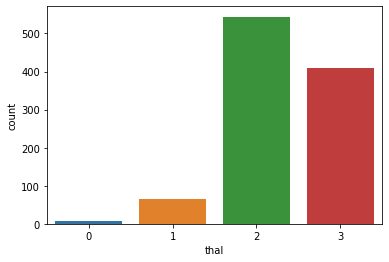

In [ ]:
sns.countplot(data.thal)
plt.show()

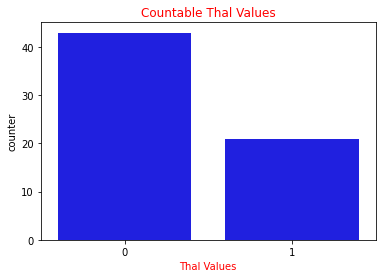

In [ ]:
#print(data[data['thal'] == 2].target.value_counts())
sns.barplot(x=data[data['thal']== 1].target.value_counts().index, y = data[data['thal']== 1].target.value_counts().values, color= 'blue')
plt.xlabel('Thal Values', color='r')
plt.ylabel('counter')
plt.title('Countable Thal Values',color = 'r')
plt.show()

In [ ]:
p=len(data[(data['thal'] == 0) & (data['target'] == 1)])
q=len(data[(data['thal'] == 0) & (data['target'] == 0)])
r=len(data[(data['thal'] == 1) & (data['target'] == 1)])
s=len(data[(data['thal'] == 1) & (data['target'] == 0)])
t=len(data[(data['thal'] == 2) & (data['target'] == 1)])
u=len(data[(data['thal'] == 2) & (data['target'] == 0)])
v=len(data[(data['thal'] == 3) & (data['target'] == 1)])
w=len(data[(data['thal'] == 3) & (data['target'] == 0)])
print('Thal 0 , Target 1:',p)
print('Thal 0 , Target 0:',q)
print('Thal 1 , Target 1:',r)
print('Thal 1 , Target 0:',s)
print('Thal 2 , Target 1:',t)
print('Thal 2 , Target 0:',u)
print('Thal 3 , Target 1:',v)
print('Thal 3 , Target 0:',w)

Thal 0 , Target 1: 3
Thal 0 , Target 0: 4
Thal 1 , Target 1: 21
Thal 1 , Target 0: 43
Thal 2 , Target 1: 412
Thal 2 , Target 0: 132
Thal 3 , Target 1: 90
Thal 3 , Target 0: 320


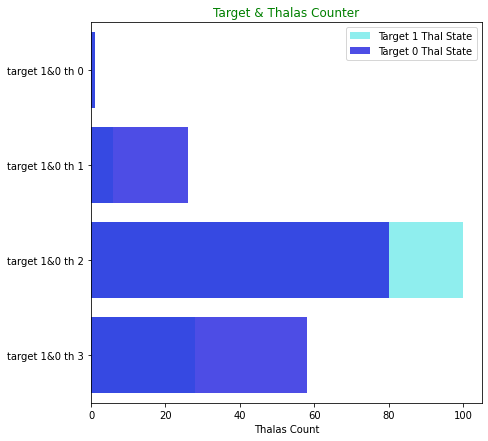

In [ ]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['target 1&0 th 0','target 1&0 th 1','target 1&0 th 2','target 1&0 th 3'],x=[1,6,100,28],color='cyan',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['target 1&0 th 0','target 1&0 th 1','target 1&0 th 2','target 1&0 th 3'],x=[1,26,80,58],color='blue',alpha=0.8,label='Target 0 Thal State')
plt.title('Target & Thalas Counter', color = 'g')
plt.legend()
plt.xlabel('Thalas Count')
plt.show()

In [ ]:
data['target'].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


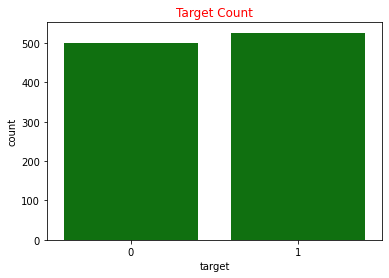

In [ ]:
sns.countplot(data['target'], color = 'g')
plt.title('Target Count', color = 'r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


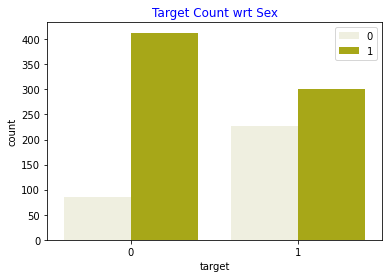

In [ ]:
sns.countplot(data['target'], hue = data['sex'], color = 'y')
plt.title('Target Count wrt Sex', color = 'b')
plt.legend()
plt.show()

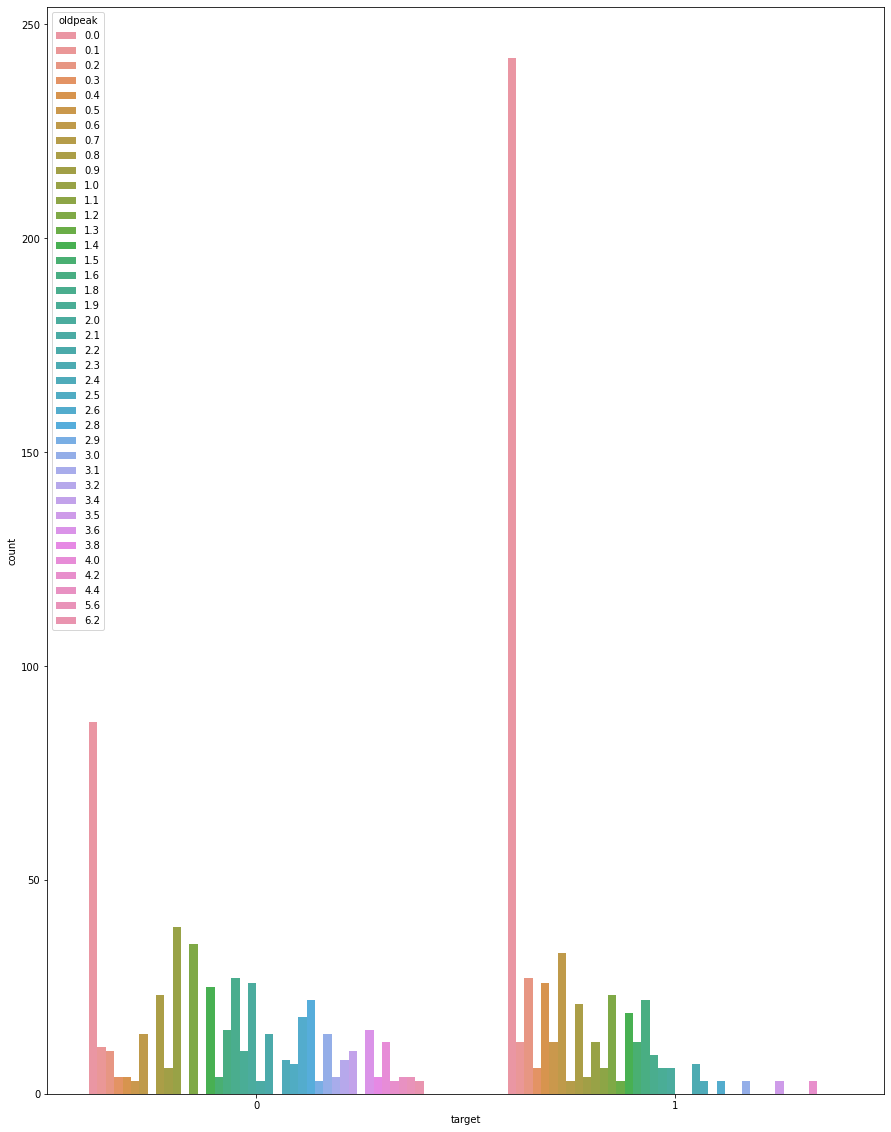

In [ ]:
plt.figure(figsize= (15,20))
sns.countplot(x= data['target'], hue = data['oldpeak'])
plt.show()

In [ ]:
data.oldpeak.unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

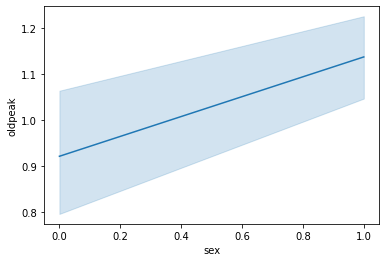

In [ ]:
sns.lineplot(x='sex', y='oldpeak',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


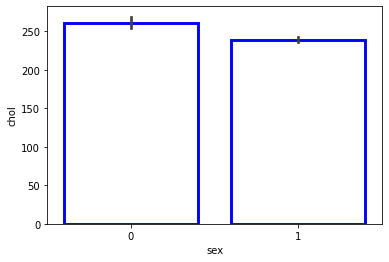

In [ ]:
sns.barplot(data['sex'], data['chol'], linewidth = 2.9, edgecolor = 'b', color = 'w')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

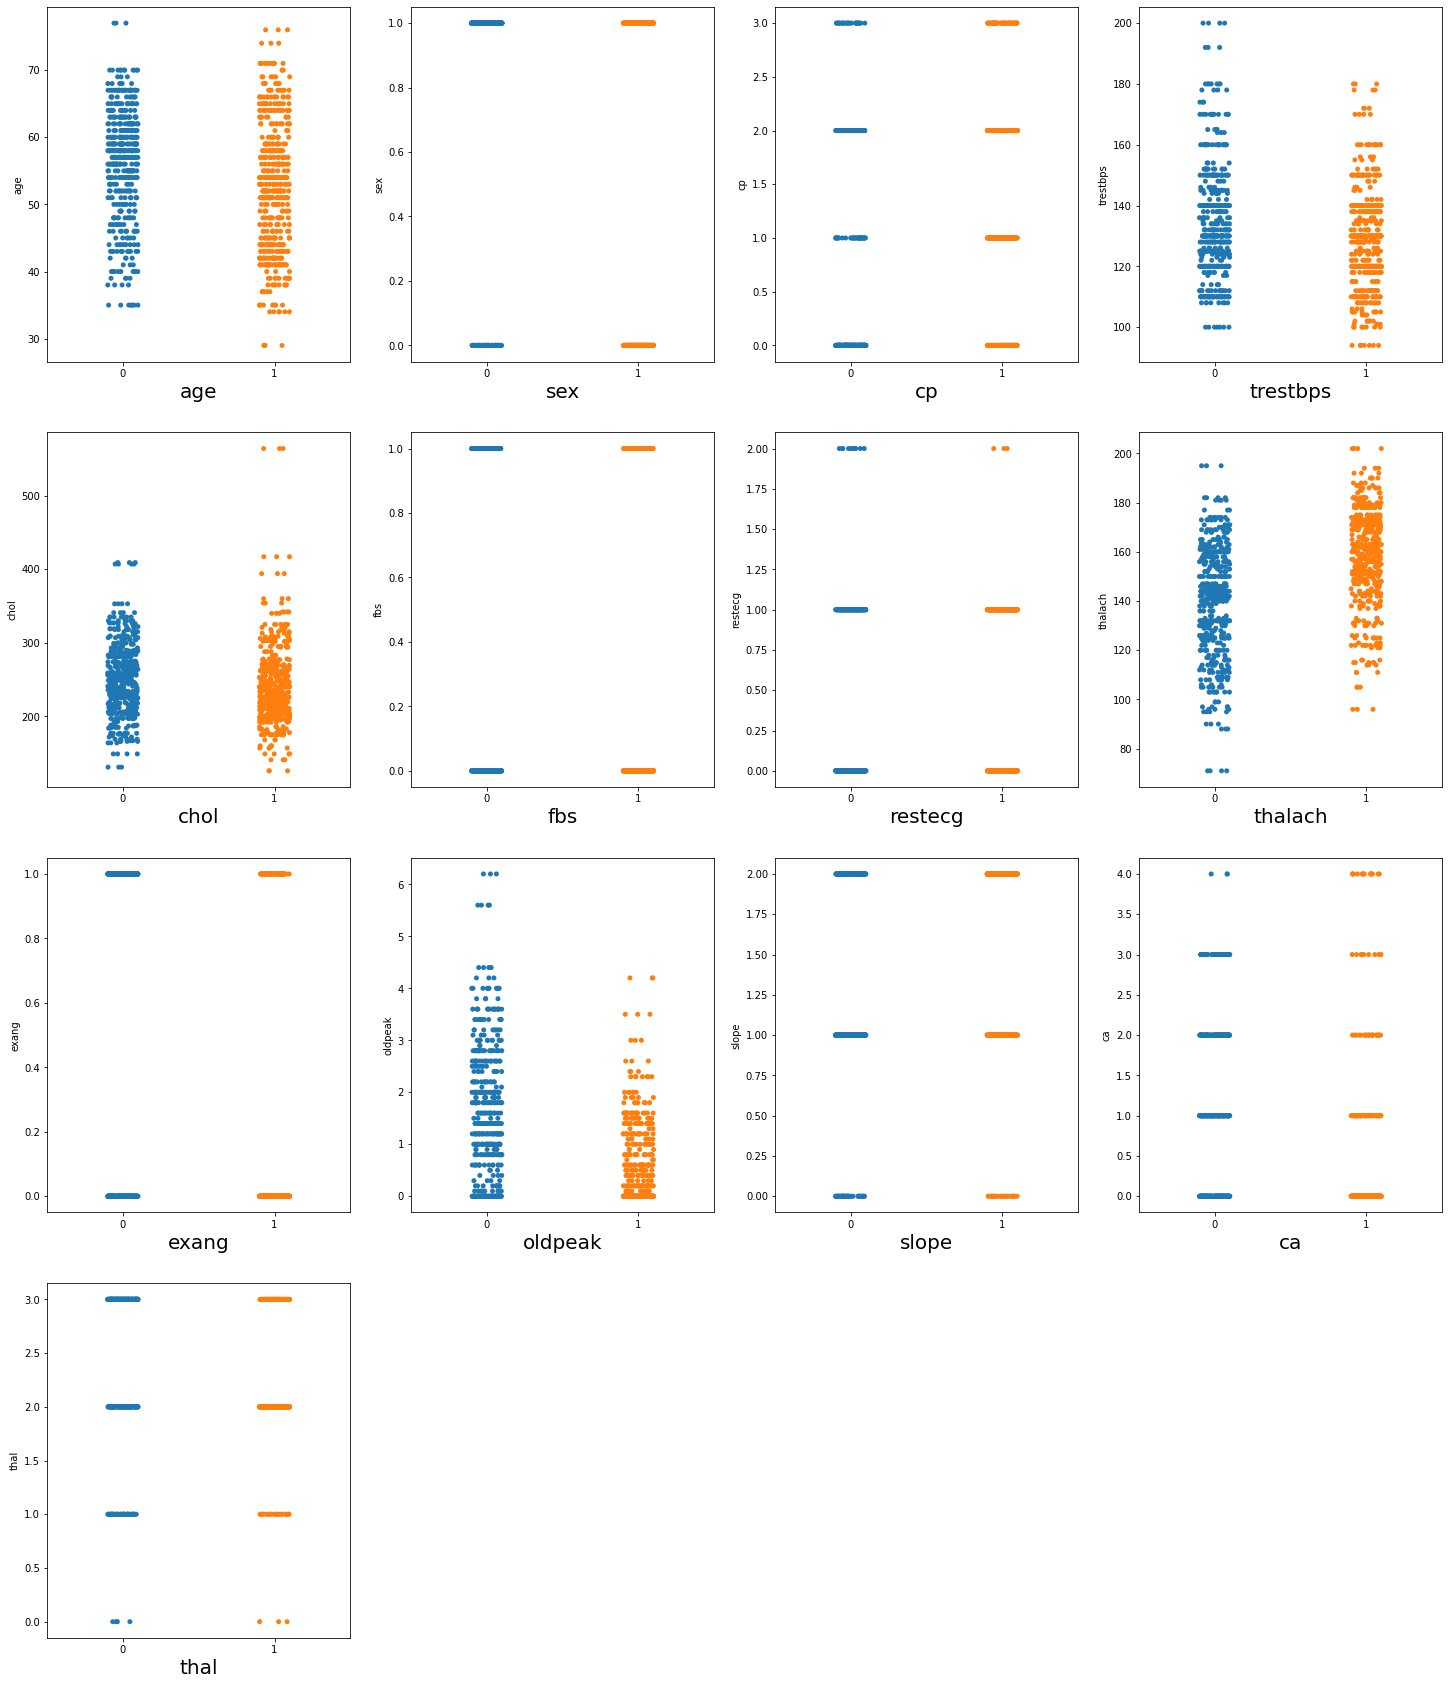

In [ ]:
plt.figure(figsize=(25, 30), facecolor= 'white')
plotnumber = 1
for column in X:
  if plotnumber<= data.shape[1]:
    ax = plt.subplot(4,4, plotnumber)
    sns.stripplot(y, X[column])
    plt.xlabel(column, fontsize = 20)
    
  plotnumber += 1
plt.show()

In [6]:
X = data.drop(columns= ['target'])
y = data['target']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size =0.25, random_state = 300)

In [8]:
x_train.shape

(768, 13)

In [9]:
x_test.shape

(257, 13)

In [10]:
y_train.shape

(768,)

In [11]:
y_test.shape

(257,)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]


In [ ]:
y_pred = logreg.predict([[52,1,0,125,212,0,1,168,0,1,2,2,3]])
print(y_pred)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8560311284046692


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       123
           1       0.82      0.93      0.87       134

    accuracy                           0.86       257
   macro avg       0.86      0.85      0.85       257
weighted avg       0.86      0.86      0.85       257



[[ 96  27]
 [ 10 124]]


Text(0.5, 1.0, 'Confusion Matrix')

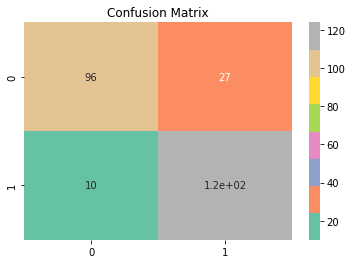

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print( conf_mat)
sns.heatmap(conf_mat, annot = True, cmap = 'Set2')
plt.title('Confusion Matrix')

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
print(false_positive)
true_negative = conf_mat[1][1]
#print(false_negative)

27


In [ ]:
Accuracy = (true_positive  + true_negative)/(true_positive + true_negative+false_positive+false_negative)
Accuracy

0.8560311284046692

In [ ]:
recall = true_positive/(true_positive + false_negative)
recall

0.9056603773584906

In [ ]:
precision = true_positive/(true_positive + false_positive)
precision

0.7804878048780488

In [ ]:
F1_score = (2 * precision * recall)/(precision + recall)
F1_score

0.8384279475982533

In [ ]:
specificity = true_negative/(true_negative + false_positive)
specificity

0.8211920529801324

In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8529304696032035

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

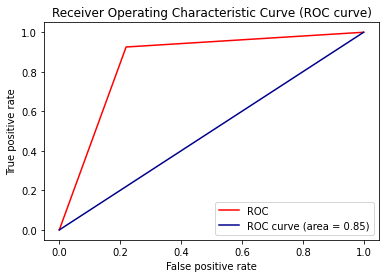

In [ ]:
plt.plot(fpr, tpr, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color = 'darkblue', label = 'ROC curve (area = %0.2f)' %auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve (ROC curve)')
plt.legend()
plt.show()